In [1]:
import pandas as pd

In [9]:
height=[160,165,170,172, 175, 178,180, 185,187]
foot_size=[230,240,250,250,255,260,260,265,270]
data={'height':height, 'foot_size':foot_size}
df=pd.DataFrame(data)
print(df['height'].corr(df.foot_size))
print(df.corr())

0.9869589912019976
             height  foot_size
height     1.000000   0.986959
foot_size  0.986959   1.000000


In [10]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import pandas as pd

In [88]:
def correlation(x,y):
    n = len(x)
    vals = range(n)
    x_sum = 0.0
    y_sum = 0.0
    x_sum_pow = 0.0
    y_sum_pow = 0.0
    mul_xy_sum = 0.0
    
    for i in vals:
        mul_xy_sum+=float(x[i])*float(y[i])
        x_sum+=float(x[i])
        y_sum+=float(y[i])
        x_sum_pow+=pow(float(x[i]),2)
        y_sum_pow+=pow(float(y[i]),2)
        
    try:
        r=((n*mul_xy_sum)-(x_sum*y_sum))/math.sqrt(((n*x_sum_pow)-pow(x_sum,2))*((n*y_sum_pow)-pow(y_sum,2)))
        
    except:
        r=0.0
            
    return r


In [92]:
def setScatterGraph(tour_table,fv_table,tourpoint):
    tour=tour_table[tour_table['resNm']==tourpoint]
    #print(tour)
    merge_table=pd.merge(tour,fv_table,left_index=True,right_index=True)
    #print(merge_table)
    fig=plt.figure()
    fig.suptitle(tourpoint+" 상관관계 분석")
    plt.subplot(1,3,1)
    plt.xlabel('중국인 입국자수')
    plt.ylabel('외국인 입장객수')
    
    #r1=correlation(list(merge_table['china']),list(merge_table['ForNum']))
    r1=merge_table['china'].corr(merge_table['ForNum'])
    plt.title('r={:.5f}'.format(r1))
    plt.scatter(list(merge_table['china']),list(merge_table['ForNum']),
               edgecolor='none',alpha=0.75, s=6, c='black')
    
    plt.subplot(1,3,2)
    plt.xlabel('일본인 입국자수')
    plt.ylabel('외국인 입장객수')
    
    #r2=correlation(list(merge_table['japan']),list(merge_table['ForNum']))
    r2=merge_table['japan'].corr(merge_table['ForNum'])
    plt.title('r={:.5f}'.format(r2))
    plt.scatter(list(merge_table['china']),list(merge_table['ForNum']),
               edgecolor='none',alpha=0.75, s=6, c='black')
    
    plt.subplot(1,3,3)
    plt.xlabel('미국인 입국자수')
    plt.ylabel('외국인 입장객수')
    
    #r3=correlation(list(merge_table['usa']),list(merge_table['ForNum']))
    r3=merge_table['usa'].corr(merge_table['ForNum'])
    plt.title('r={:.5f}'.format(r3))
    plt.scatter(list(merge_table['usa']),list(merge_table['ForNum']),
               edgecolor='none',alpha=0.75, s=6, c='black')

In [96]:
def main():
    font_location ="c:/Windows/fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    matplotlib.rc('font', family=font_name)
    
    tpFileName ='data/서울특별시_관광지입장정보_2011_2016.json'
    data=open(tpFileName, 'r', encoding='utf-8').read()
    jsonTP = json.loads(data)
    tour_table = pd.DataFrame(jsonTP,columns=('yyyymm', 'resNm', 'ForNum'))
    tour_table = tour_table.set_index('yyyymm')
    #print(tour_table)
    
    resNm = tour_table.resNm.unique()
    #print(resNm)
    
    fv_CFileName ='data/중국(112)_해외방문객정보_2011_2016.json'
    data=open(fv_CFileName, 'r', encoding='utf-8').read()
    jsonFV = json.loads(data)
    china_table = pd.DataFrame(jsonFV,columns=('yyyymm', 'visit_cnt'))
    china_table=china_table.rename(columns={'visit_cnt':'china'})
    china_table = china_table.set_index('yyyymm')
   # print(china_table)
    
    fv_JFileName ='data/일본(130)_해외방문객정보_2011_2016.json'
    data=open(fv_JFileName, 'r', encoding='utf-8').read()
    jsonFV = json.loads(data)
    japan_table = pd.DataFrame(jsonFV,columns=('yyyymm', 'visit_cnt'))
    japan_table=japan_table.rename(columns={'visit_cnt':'japan'})
    japan_table = japan_table.set_index('yyyymm')
    #print(japan_table)
    
    fv_UFileName ='data/미국(275)_해외방문객정보_2011_2016.json'
    data=open(fv_UFileName, 'r', encoding='utf-8').read()
    jsonFV = json.loads(data)
    usa_table = pd.DataFrame(jsonFV,columns=('yyyymm', 'visit_cnt'))
    usa_table=usa_table.rename(columns={'visit_cnt':'usa'})
    usa_table = usa_table.set_index('yyyymm')
    #print(usa_table)
    
    fv_table=pd.merge(china_table,japan_table,left_index=True,right_index=True)
    fv_table=pd.merge(fv_table,usa_table,left_index=True,right_index=True)
    #print(fv_table)
    
    r_list=[]
    for tourpoint in resNm:
        r_list.append(setScatterGraph(tour_table, fv_table,tourpoint))
    
    #r_table=pd.DataFrame(r_list,columns=('tourpoint','china','japan','usa'))
    #r_table=r_table.set_index('tourpoint')
    #print(r_table)
    #r_table=r_table.drop('서울시립미술관 본관')
    #r_table=r_table.drop('서대문자연사박물관')
    #r_table.plot(kind='bar',rot=70)
    plt.show()
        

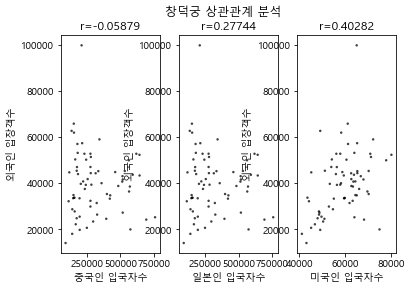

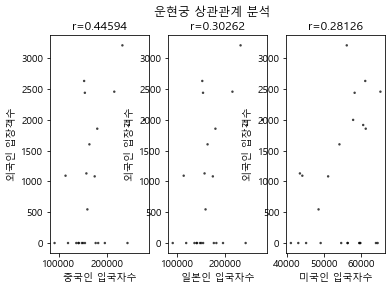

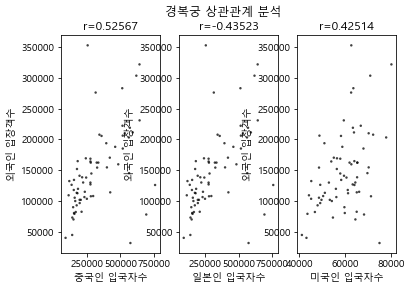

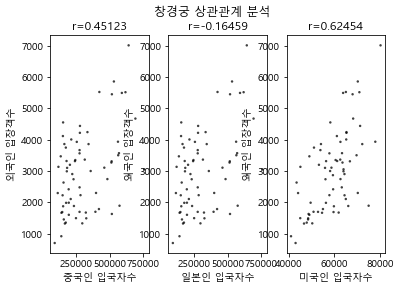

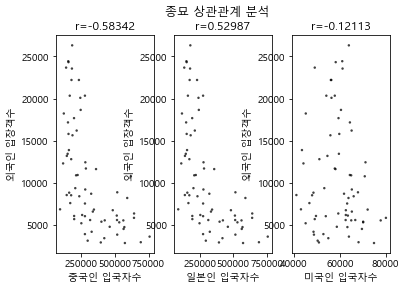

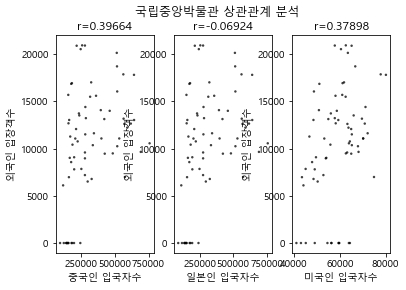

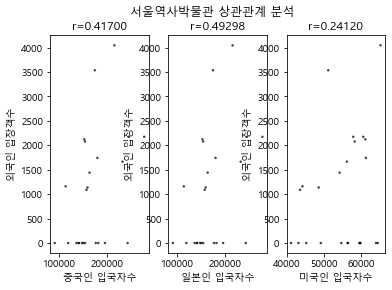

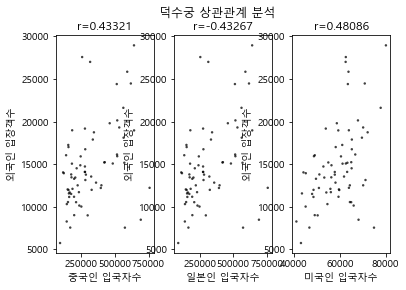

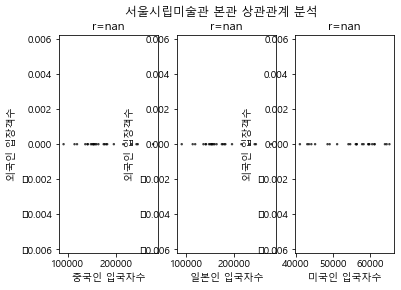

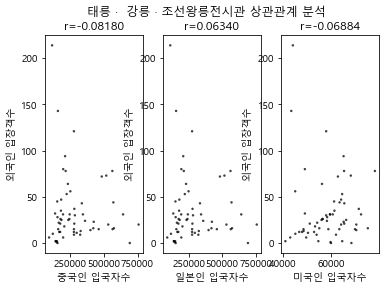

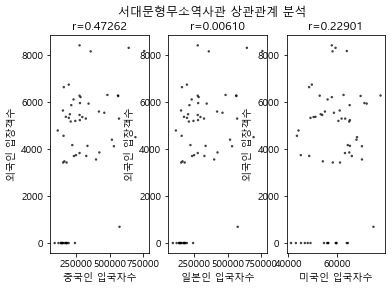

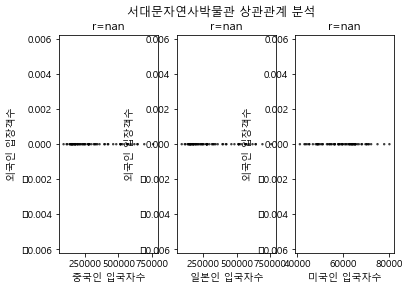

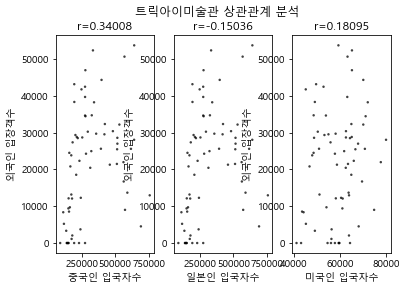

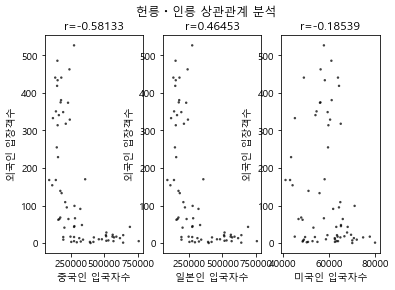

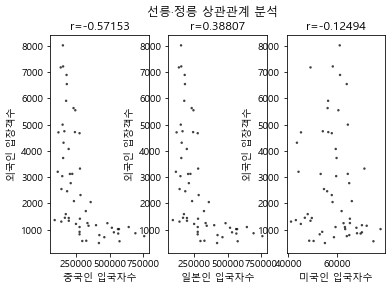

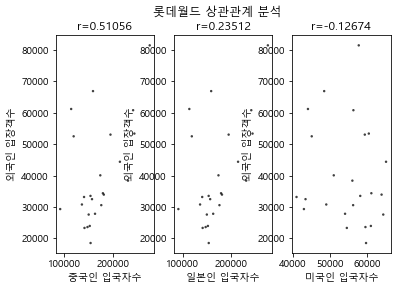

In [97]:
if __name__=='__main__':
    main()